In [1]:
import numpy as np
from PIL import Image, ImageFile
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = None
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# We load the .png files to numpy arrays
z20_data = Image.open('./original_images/z20_data.png')
z20_data_arr = np.array(z20_data)

z20_label = Image.open('./original_images/z20_label.png')
z20_label_arr = np.array(z20_label)

In [3]:
# We try to plot the images on top of each other to check if the labels are correct
z20_data_part = z20_data_arr[3900:4100, 5500:6000]
z20_label_part = z20_label_arr[3900:4100, 5500:6000]

In [4]:
#z20_label_part
def enlarge_markers(arr):
    row, col = arr.shape
    arr_copy = np.copy(arr)
    for r in range(row):
        for c in range(col):
            if arr[r, c] != 0:
                if r > 0 and c > 0:
                    arr_copy[r-1, c-1] = arr[r, c]
                if r > 0:
                    arr_copy[r-1, c] = arr[r, c]
                if r > 0 and c < col-2:
                    arr_copy[r-1, c+1] = arr[r, c]
                if r < row-2 and c > 0:
                    arr_copy[r+1, c-1] = arr[r, c]
                if r < row-2:
                    arr_copy[r+1, c] = arr[r, c]
                if r < row-2 and c < col-2:
                    arr_copy[r+1, c+1] = arr[r, c]
                if r < row-2 and c > 0:
                    arr_copy[r+2, c-1] = arr[r, c]
                if r < row-2:
                    arr_copy[r+2, c] = arr[r, c]
                if r < row-2 and c < col-2:
                    arr_copy[r+2, c+1] = arr[r, c]
    return arr_copy
                
z20_label_part_enlarged = enlarge_markers(z20_label_part)

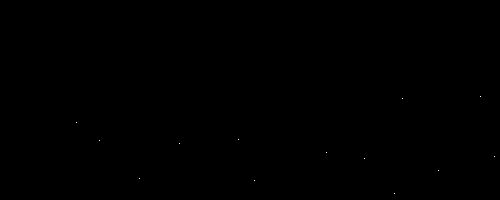

In [5]:
data_part_img = Image.fromarray(z20_data_part)
label_part_img = Image.fromarray(z20_label_part)
label_part_img

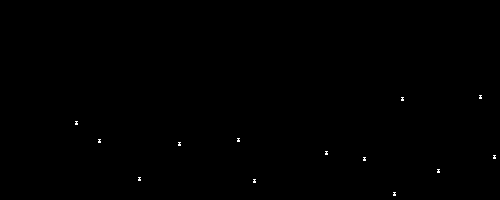

In [6]:
label_part_img_enlarged = Image.fromarray(z20_label_part_enlarged)
label_part_img_enlarged

In [7]:
data_part_img.paste(label_part_img_enlarged, (0,0), mask = label_part_img_enlarged)

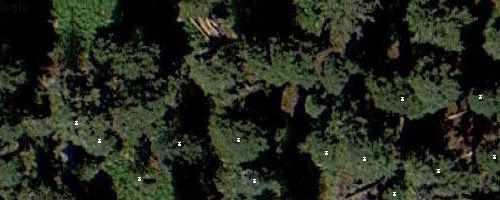

In [8]:
data_part_img

In [9]:
# The labels in look correct in the image above
# We will start dividing the data and label image into smaller images so it's easier to work with
#z20_data_arr
#z20_label_arr
rows, cols = z20_data_arr.shape[:2]
divide_coeff = 10
for row in range(divide_coeff):
    for col in range(divide_coeff):
        img_number = 5*row+col
        data_img = Image.fromarray(z20_data_arr[row*rows//divide_coeff:(row+1)*rows//divide_coeff, col*cols//divide_coeff:(col+1)*cols//divide_coeff])
        label_img = Image.fromarray(z20_label_arr[row*rows//divide_coeff:(row+1)*rows//divide_coeff, col*cols//divide_coeff:(col+1)*cols//divide_coeff])
        data_img.save(f'{img_number}_data.png')
        label_img.save(f'{img_number}_label.png')

In [10]:
label_19 = Image.open('19_label.png')
label_19_arr = np.array(label_19)
label_19_arr_enlarged = enlarge_markers(label_19_arr)
label_19_enlarged = Image.fromarray(label_19_arr_enlarged)
data_19 = Image.open('19_data.png')
data_19.paste(label_19_enlarged, (0,0), mask = label_19_enlarged)

In [11]:
data_19.save('data_19_labeled.png')